In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing



In [38]:
data = pd.read_csv("D:\Data Science\Assignment\Assignment 18\Airlines+Data.csv")
data.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [39]:
data.tail()

,Month,Passengers
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271
95,Dec-02,306


<Axes: >

<Figure size 1200x800 with 0 Axes>

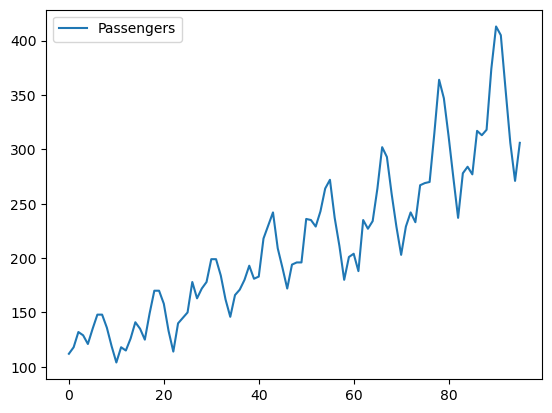

In [40]:
plt.figure(figsize=(12,8))
data.plot()

<Figure size 1000x400 with 0 Axes>

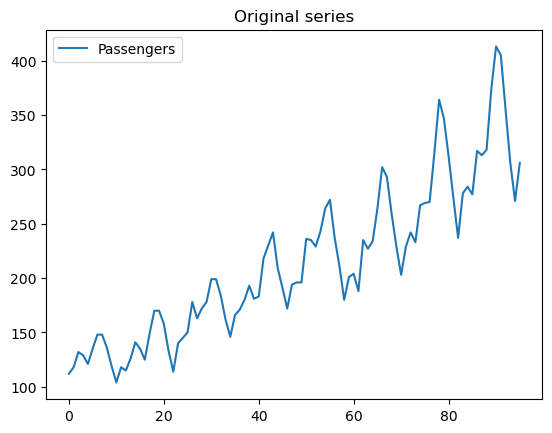

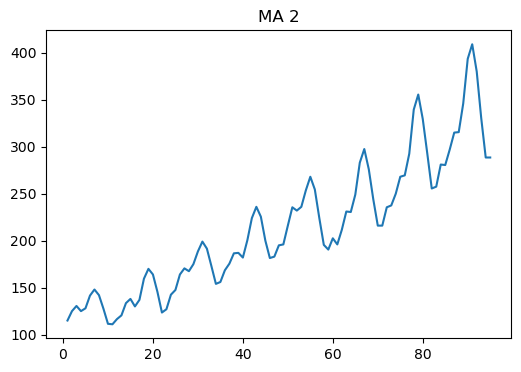

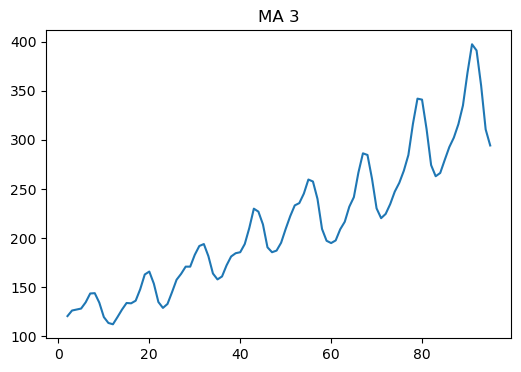

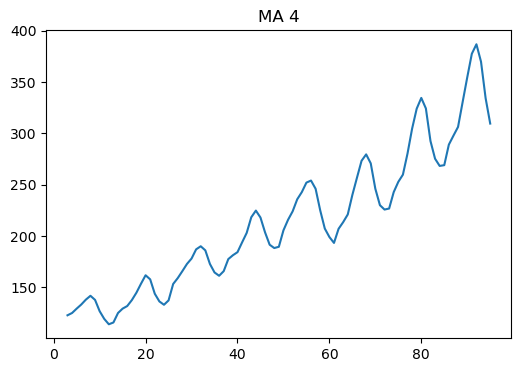

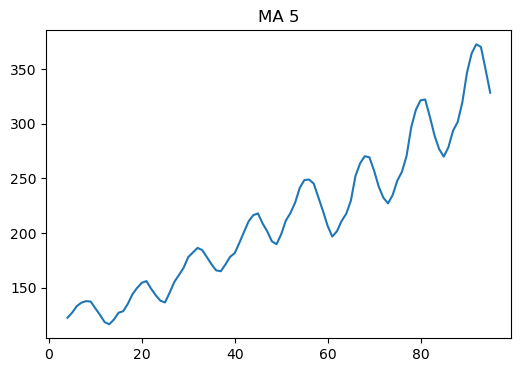

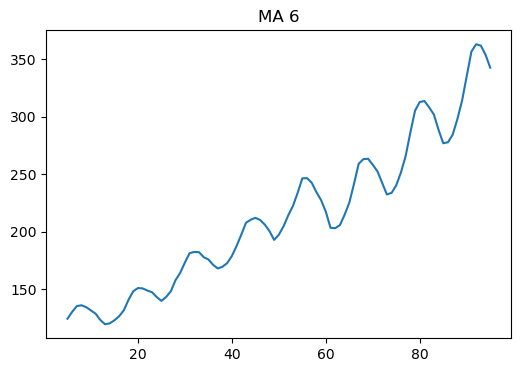

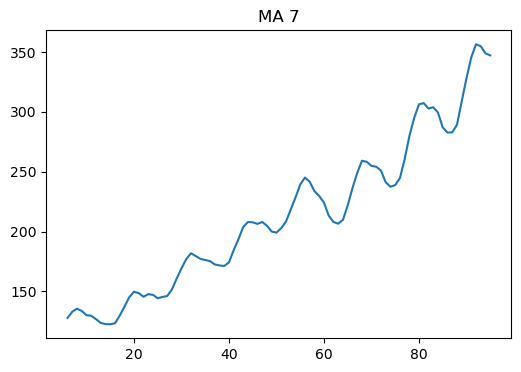

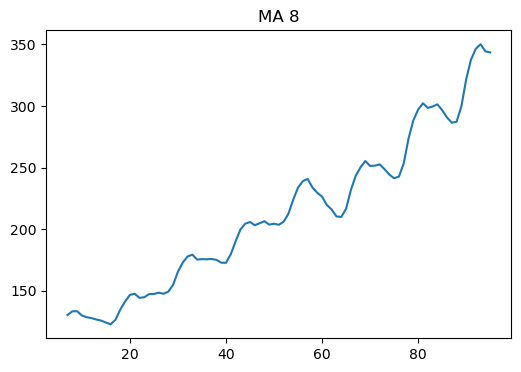

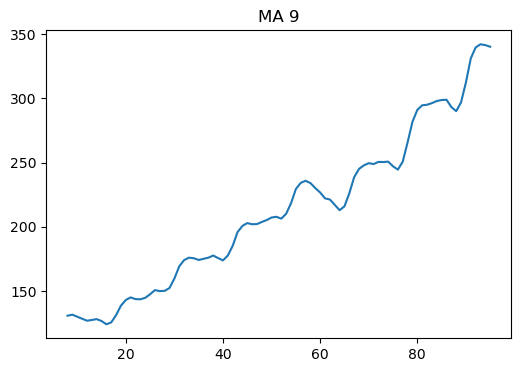

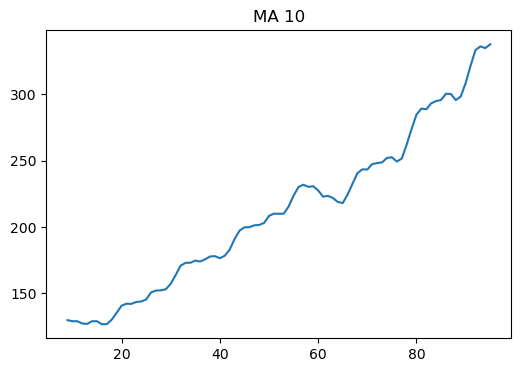

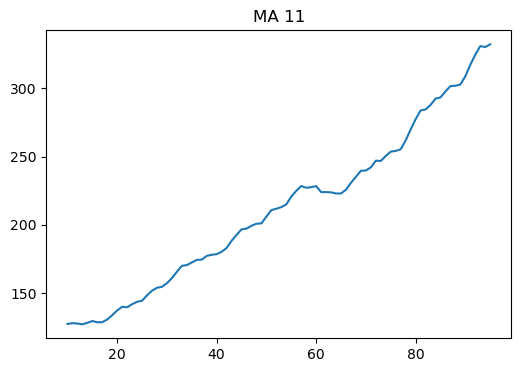

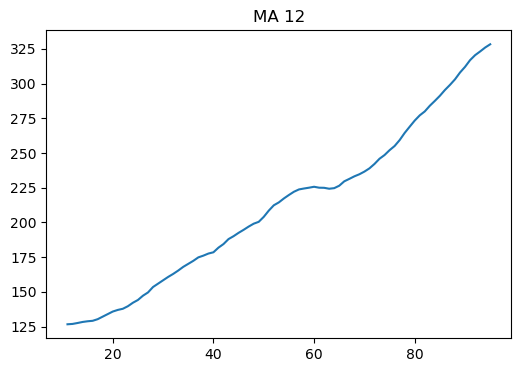

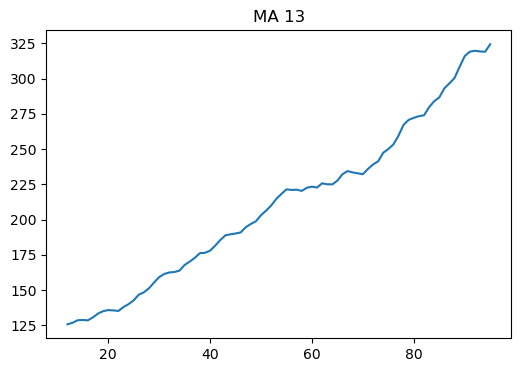

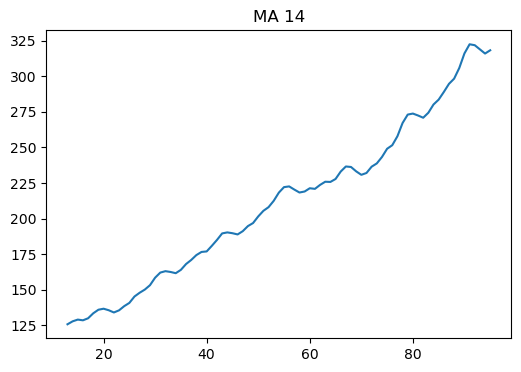

In [41]:
plt.figure(figsize=(10,4))
data.plot()
plt.title("Original series")

for i in range(2,15):
    plt.figure(figsize=(6,4))

    data["Passengers"].rolling(i).mean().plot()
    plt.title("MA "+str(i))
    plt.show()

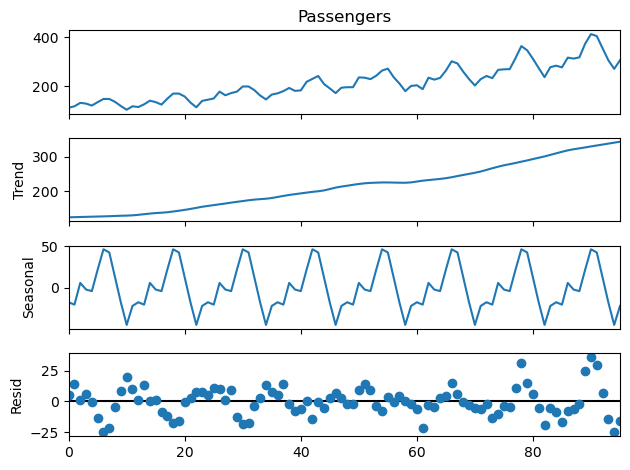

In [42]:
sed =seasonal_decompose(data["Passengers"], period=12, two_sided=True, extrapolate_trend=1)
sed.plot()
plt.show()

In [43]:
def MAPE(org,pred):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [44]:
data.shape

(96, 2)

In [45]:
Train = data.head(77)
Test = data.tail(19)

In [46]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

26.912216045974304

In [47]:
import numpy as np
x=np.linspace(0.1,1,20)
for i in x :
    ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
    score=MAPE(pred_ses,Test.Passengers)
    print("Smoothing Level: ",i ,"MAPE Error ",score)

Smoothing Level:  0.1 MAPE Error  31.52238783469404
Smoothing Level:  0.1473684210526316 MAPE Error  28.65031442430204
Smoothing Level:  0.19473684210526315 MAPE Error  27.05566881948365
Smoothing Level:  0.24210526315789474 MAPE Error  25.89455555733528
Smoothing Level:  0.2894736842105263 MAPE Error  24.917936427086854
Smoothing Level:  0.33684210526315794 MAPE Error  24.04189179891902
Smoothing Level:  0.38421052631578945 MAPE Error  23.244499847844903
Smoothing Level:  0.43157894736842106 MAPE Error  22.52700522338114
Smoothing Level:  0.4789473684210527 MAPE Error  21.89583272532412
Smoothing Level:  0.5263157894736842 MAPE Error  21.35484176472015
Smoothing Level:  0.5736842105263158 MAPE Error  20.90312978242081
Smoothing Level:  0.6210526315789474 MAPE Error  20.535503769200034
Smoothing Level:  0.6684210526315789 MAPE Error  20.243883380351722
Smoothing Level:  0.7157894736842105 MAPE Error  20.018727415093053
Smoothing Level:  0.7631578947368421 MAPE Error  19.850106384598096

In [48]:
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

12.782909627190644

In [49]:
import numpy as np
alphas=np.arange(0.1,1,0.1)
betas=np.arange(0.1,1,0.1)
l=[]
for i in alphas :
    for j in betas:
        hw_model = Holt(Train["Passengers"]).fit(smoothing_level=i, smoothing_slope=j)
        print(hw_model)
        pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])

        score=MAPE(pred_hw,Test.Passengers)
        print("Smoothing Level ",i," Smoothing Slope ",j,"MAPE Error ",score)
        l.append((i,j,score))

Smoothing Level  0.1  Smoothing Slope  0.1 MAPE Error  17.865238502790792
Smoothing Level  0.1  Smoothing Slope  0.2 MAPE Error  19.959549999613763
Smoothing Level  0.1  Smoothing Slope  0.30000000000000004 MAPE Error  17.22391828657541
Smoothing Level  0.1  Smoothing Slope  0.4 MAPE Error  16.13255909102089
Smoothing Level  0.1  Smoothing Slope  0.5 MAPE Error  15.020000906771005
Smoothing Level  0.1  Smoothing Slope  0.6 MAPE Error  14.38015069470689
Smoothing Level  0.1  Smoothing Slope  0.7000000000000001 MAPE Error  15.954054338508687
Smoothing Level  0.1  Smoothing Slope  0.8 MAPE Error  22.306310058716218
Smoothing Level  0.1  Smoothing Slope  0.9 MAPE Error  32.56746173972074
Smoothing Level  0.2  Smoothing Slope  0.1 MAPE Error  17.529142575712683
Smoothing Level  0.2  Smoothing Slope  0.2 MAPE Error  16.678312655947142
Smoothing Level  0.2  Smoothing Slope  0.30000000000000004 MAPE Error  16.733089515266293
Smoothing Level  0.2  Smoothing Slope  0.4 MAPE Error  19.27789299077

In [50]:
hw_dataframe = pd.DataFrame(l,columns=["Smoothing Level","Smoothing Slope","Score"])
hw_dataframe.sort_values(['Score'])

,Smoothing Level,Smoothing Slope,Score
53,0.6,0.9,12.736137
61,0.7,0.8,12.740341
73,0.9,0.2,12.762748
78,0.9,0.7,12.771427
64,0.8,0.2,12.782910
...,...,...,...
33,0.4,0.7,30.116610
34,0.4,0.8,31.108709
8,0.1,0.9,32.567462
25,0.3,0.8,33.657080


In [51]:
hwe_model = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe = hwe_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe,Test.Passengers)

9.22613464816853

In [57]:
hwe_model_real= ExponentialSmoothing(data["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
hwe_model_real.forecast(10)

96     319.235309
97     311.528442
98     350.278768
99     346.985086
100    351.845152
101    403.925810
102    440.566873
103    427.446506
104    376.628192
105    329.767552
dtype: float64